# 4a

In [2]:
import pickle
from scipy.linalg import eig
from scipy.linalg import sqrtm
from numpy.linalg import inv
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

x_train = pickle.load(open('x_train.p', 'rb'))
y_train = pickle.load(open('y_train.p', 'rb'))
x_test  = pickle.load(open('x_test.p', 'rb'))
y_test  = pickle.load(open('y_test.p', 'rb'))
def sample_mean(samples):
    return np.average(samples, axis=0)

def sample_variance(X, Y):
    mean_x = sample_mean(X)
    mean_y = sample_mean(Y)
    return 1/956 * np.sum(np.matrix((X[i]-mean_x)).T * np.matrix((Y[i]-mean_y)) for i in range(956))


# 4b

/mnt/Data/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


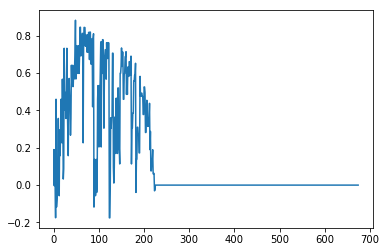

In [3]:
def flatten(matrix):
    flattened = np.empty((len(matrix),15*15*3))
    for i, x in enumerate(matrix):
        j = 0
        for x_ in x:
            for x__ in x_: 
                for x___ in x__:
                    flattened[i][j] = float(x___) *2/255 -1
                    j += 1
    return flattened
              


X = flatten(x_train)
Y = flatten(y_train)
X_test = flatten(x_test)
Y_test = flatten(y_test)
sigma_xx = sample_variance(X, X)
sigma_xy = sample_variance(X, Y)
sigma_yy = sample_variance(Y, Y)
eigenvalues = eig( inv(sqrtm(sigma_xx + 0.00001*np.identity(675))).dot(sigma_xy).dot(inv(sqrtm(sigma_yy + 0.00001*np.identity(675)))))
plt.plot(eigenvalues[0])
plt.show()

# 4c

In [4]:
import cv2
def plot_image (count, vector) :
    vector = (( vector +1.0) /2.0) *255.0
    vector = np . reshape ( vector ,(15 ,15 ,3) )
    p = vector.astype ('uint8')
    p = cv2.resize (p,(100 ,100) ) 
    cv2.imwrite ('eigenface' +str(count)+ '.png' ,p)
U = eigenvalues[1]
plot_image('4c', U[0].dot(X[0])*U[0])

/mnt/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


# 4d

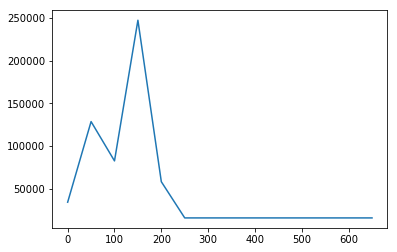

In [5]:
def ridge(X, U, l):
    sizeidentity = X.shape[1]
    pi = inv(X.T.dot(X) + l*np.identity(sizeidentity) ).dot(X.T).dot(U)
    return pi

import numpy.linalg as nl 
def square_eucl_dist(pi, X, U):
    total_dist = 0
    for x, u in zip(X, U):
        dist = nl.norm(x.dot(pi) - u)
        total_dist += np.square(dist)
    return total_dist
dimensions = [0,50,100,150,200,250,300,350,400,450,500,650]
error = []
for k in dimensions:
    Pk = U[0:k].T
    w = ridge(X.dot(Pk),Y,0.00001)
    err = square_eucl_dist(w, X_test.dot(Pk), Y_test)
    error.append(err)
plt.plot(dimensions, error)
plt.show()

# 4e

In [6]:
for i in range(1,5):
    plot_image(str(i)+'Predicted', X_test[i].dot(Pk).dot(w))
    plot_image(str(i)+'Mooney', X_test[i])
    plot_image(str(i)+'GroundTruth', Y_test[i])


/mnt/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
